## Mean-Variance Optimization

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [8]:
ticker_description = pd.read_excel("multi_asset_etf_data.xlsx", sheet_name='descriptions')
prices = pd.read_excel("multi_asset_etf_data.xlsx", sheet_name='prices')
tot_return = pd.read_excel("multi_asset_etf_data.xlsx", sheet_name='total returns')
excess_return = pd.read_excel("multi_asset_etf_data.xlsx", sheet_name='excess returns')

ticker_description.head(5)

,ticker,shortName,quoteType,currency,volume,totalAssets,longBusinessSummary
0,SPY,SPDR S&P 500,ETF,USD,NaN,NaN,NaN
1,EFA,iShares MSCI EAFE ETF,ETF,USD,NaN,NaN,NaN
2,EEM,iShares MSCI Emerging Index Fun,ETF,USD,NaN,NaN,NaN
3,PSP,Invesco Global Listed Private E,ETF,USD,NaN,NaN,NaN
4,QAI,NYLI Hedge Multi-Strategy Track,ETF,USD,NaN,NaN,NaN


In [9]:
prices.head(5)

,Date,BWX,DBC,EEM,EFA,HYG,IEF,IYR,PSP,QAI,SHV,SPY,TIP
0,2011-01-31,24.350737,24.932129,33.842106,39.154465,41.369602,69.510223,36.002327,22.359201,22.247889,91.488312,99.297096,75.034828
1,2011-02-28,24.511862,25.972059,33.827332,40.544365,41.963394,69.365349,37.629772,23.256830,22.305355,91.496567,102.746445,75.575668
2,2011-03-31,24.718430,26.662436,35.954922,39.576050,41.981182,69.258118,37.218288,23.644442,22.428499,91.512306,102.758766,76.475258
3,2011-04-30,25.924810,27.877144,36.937466,41.802536,42.651890,70.533417,38.953907,25.031689,22.855396,91.562141,105.734825,78.293839
4,2011-05-31,25.573650,26.435223,35.851501,40.880329,42.708733,72.300583,39.348637,23.991255,22.855396,91.552986,104.549042,78.502037


In [10]:
tot_return.head(5)

,Date,BWX,DBC,EEM,EFA,HYG,IEF,IYR,PSP,QAI,SHV,SPY,TIP
0,2011-02-28,0.006617,0.041710,-0.000437,0.035498,0.014353,-0.002084,0.045204,0.040146,0.002583,-0.000410,0.034738,0.007208
1,2011-03-31,0.008427,0.026581,0.062896,-0.023883,0.000424,-0.001546,-0.010935,0.016667,0.005521,-0.000328,0.000120,0.011903
2,2011-04-30,0.048805,0.045559,0.027327,0.056258,0.015976,0.018414,0.046633,0.058671,0.019034,0.000045,0.028962,0.023780
3,2011-05-31,-0.013545,-0.051724,-0.029400,-0.022061,0.001333,0.025054,0.010133,-0.041565,0.000000,-0.000600,-0.011215,0.002659
4,2011-06-30,-0.000097,-0.042645,-0.009355,-0.012108,-0.005705,-0.005043,-0.031060,-0.042581,-0.010776,-0.000327,-0.016869,0.007548


In [11]:
excess_return.head(5)

,Date,BWX,DBC,EEM,EFA,HYG,IEF,IYR,PSP,QAI,SPY,TIP
0,2011-02-28,0.007027,0.042120,-0.000027,0.035908,0.014763,-0.001674,0.045614,0.040556,0.002993,0.035147,0.007618
1,2011-03-31,0.008755,0.026909,0.063224,-0.023555,0.000752,-0.001218,-0.010607,0.016995,0.005849,0.000448,0.012231
2,2011-04-30,0.048760,0.045514,0.027283,0.056214,0.015932,0.018369,0.046589,0.058627,0.018989,0.028917,0.023735
3,2011-05-31,-0.012945,-0.051124,-0.028800,-0.021461,0.001933,0.025654,0.010733,-0.040965,0.000600,-0.010615,0.003259
4,2011-06-30,0.000230,-0.042318,-0.009027,-0.011781,-0.005378,-0.004716,-0.030733,-0.042254,-0.010449,-0.016542,0.007876


# Summary Statistics


In [ ]:
##Summary statistics


## Descriptive Analysis

In [9]:
# Create excess return DataFrame without date column and check for NaN values
excess_return_1 = excess_return.drop(columns=['Date'])
print(excess_return_1.isna().sum())

BWX    0
DBC    0
EEM    0
EFA    0
HYG    0
IEF    0
IYR    0
PSP    0
QAI    0
SPY    0
TIP    0
dtype: int64


,BWX,DBC,EEM,EFA,HYG,IEF,IYR,PSP,QAI,SPY,TIP
BWX,0.000556,0.000267,0.000782,0.000622,0.000327,0.000245,0.000649,0.000809,0.000221,0.000454,0.000237
DBC,0.000267,0.002365,0.001306,0.001114,0.000512,-0.000267,0.000690,0.001411,0.000340,0.000901,0.000082
EEM,0.000782,0.001306,0.002698,0.001873,0.000805,0.000019,0.001498,0.002459,0.000581,0.001502,0.000292
EFA,0.000622,0.001114,0.001873,0.001930,0.000775,0.000015,0.001518,0.002486,0.000537,0.001569,0.000251
HYG,0.000327,0.000512,0.000805,0.000775,0.000498,0.000073,0.000808,0.001129,0.000256,0.000732,0.000179
IEF,0.000245,-0.000267,0.000019,0.000015,0.000073,0.000333,0.000265,0.000020,0.000045,-0.000004,0.000201
IYR,0.000649,0.000690,0.001498,0.001518,0.000808,0.000265,0.002397,0.002293,0.000498,0.001538,0.000428
PSP,0.000809,0.001411,0.002459,0.002486,0.001129,0.000020,0.002293,0.003861,0.000765,0.002286,0.000382
QAI,0.000221,0.000340,0.000581,0.000537,0.000256,0.000045,0.000498,0.000765,0.000200,0.000504,0.000110
SPY,0.000454,0.000901,0.001502,0.001569,0.000732,-0.000004,0.001538,0.002286,0.000504,0.001706,0.000241


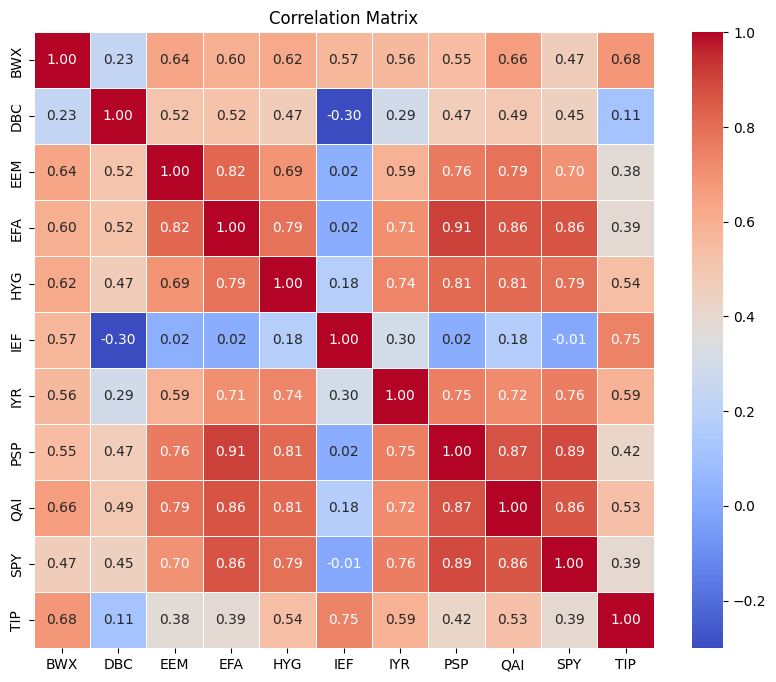

In [10]:
# Build and display covariance matrix
covariance_matrix = excess_return_1.cov()
display(covariance_matrix)

# Build correlation matrix
correlation_matrix = excess_return_1.corr()

# Display correlation matrix as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix')
plt.show()

# The MV frontier

In [46]:
#exclude the date column
data = excess_return.drop('Date',axis=1)

In [47]:
excess_mean = 12*data.mean() 
ones = np.ones(excess_mean.shape[0])
covv = data.cov().to_numpy()
inv_covv = np.linalg.inv(covv)
delta_m = 1/(ones.T@inv_covv@excess_mean)
w_tan = delta_m*inv_covv@excess_mean
w_tan=w_tan.reshape(-1,1)

In [52]:
weights = {name:w_tan[i][0] for i,name in enumerate(data.columns)}
weights_tan = pd.Series(weights).sort_values(ascending=False)
weights_tan

SPY    10.729782
IEF     9.010591
HYG     2.634922
TIP     1.330595
EEM     0.853591
EFA     0.385285
DBC    -0.112341
PSP    -1.716842
IYR    -2.382146
BWX    -6.117430
QAI   -13.616007
dtype: float64

In [ ]:
std = data.std()*np.sqrt(12)
shard_ratio = excess_mean/std
shard_ratio = shard_ratio.sort_values(ascending=False)
shard_ratio

SPY    0.897103
HYG    0.544873
IYR    0.444143
PSP    0.433804
EFA    0.409372
TIP    0.401091
QAI    0.393838
IEF    0.258569
EEM    0.166542
DBC   -0.031774
BWX   -0.093202
dtype: float64

In [65]:
tik = {name:{'std':std[name] , 'mean':excess_mean[name] ,'sharpe ratio':shard_ratio[name], 'weight':weights_tan[name] }  for i,name in enumerate(data.columns)}
df = pd.DataFrame(tik).T

In [66]:
#ranking by weights
df2 = df.sort_values(by='weight', ascending=False)
df2

,std,mean,sharpe ratio,weight
SPY,0.142839,0.128141,0.897103,10.729782
IEF,0.063442,0.016404,0.258569,9.010591
HYG,0.075928,0.041371,0.544873,2.634922
TIP,0.051115,0.020502,0.401091,1.330595
EEM,0.176164,0.029339,0.166542,0.853591
EFA,0.150903,0.061775,0.409372,0.385285
DBC,0.166553,-0.005292,-0.031774,-0.112341
PSP,0.213370,0.092561,0.433804,-1.716842
IYR,0.168675,0.074916,0.444143,-2.382146
BWX,0.082789,-0.007716,-0.093202,-6.117430


In [67]:
df3 = df.sort_values(by='sharpe ratio', ascending=False)
df3

,std,mean,sharpe ratio,weight
SPY,0.142839,0.128141,0.897103,10.729782
HYG,0.075928,0.041371,0.544873,2.634922
IYR,0.168675,0.074916,0.444143,-2.382146
PSP,0.213370,0.092561,0.433804,-1.716842
EFA,0.150903,0.061775,0.409372,0.385285
TIP,0.051115,0.020502,0.401091,1.330595
QAI,0.049073,0.019327,0.393838,-13.616007
IEF,0.063442,0.016404,0.258569,9.010591
EEM,0.176164,0.029339,0.166542,0.853591
DBC,0.166553,-0.005292,-0.031774,-0.112341


As we can see the largest weights coreponded to the largest sharpe ratio. For example SPY who had the largest weight coresponded to the best sharpe ratio. However, it is not exactly in descending order, since the second largest weight is IEF but it did not corespond to the second largest sharpe ratio, whihc in this case was HYG.

In [79]:
# Compute the mean, volatility, and Sharpe ratio for the tangency portfolio
mean_tan = w_tan.T@excess_mean.to_numpy()
vol_tan = w_tan.T@covv@w_tan
sharpe_ration = mean_tan[0]/np.sqrt(vol_tan[0][0])
print(f'Mean: {mean_tan[0]:.2f}\nVolatility: {vol_tan[0][0]:.2f}\nShraper Ratio: {sharpe_ration:.2f}')


Mean: 1.16
Volatility: 0.05
Shraper Ratio: 5.38


These are the following metrics for the tangency portfolio for $w^{tan}$